# hardware


In [4]:
!nvidia-smi

Wed Jul 31 07:25:57 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P0              26W /  70W |   2703MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# Download Dataset

In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="your api")
project = rf.workspace("cigarette-detector").project("cigarettes-reality-2")
version = project.version(21)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.3 MB/s eta 0:00:00
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:
      Successfully uninstalled chardet-5.2.0
loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.196`, to intall it `pip install ultralytics==8.0.196`.



Extracting Dataset Version Zip to Cigarettes-reality-2-21 in yolov8:: 100%|██████████| 7787/7787 [00:04<00:00, 1623.68it/s]


# Train Model

In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 1.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov10n.pt')

# Define training arguments including early stopping
train_args = {
    'data': '/content/Cigarettes-reality-2-21/data.yaml',
    'epochs': 100,
    'imgsz': 640,
    'patience': 5  # This will enable early stopping with patience of 5 epochs
}

# Train the model
results = model.train(**train_args)

100%|██████████| 5.59M/5.59M [00:00<00:00, 238MB/s]


Ultralytics YOLOv8.2.70 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov10n.pt, data=/content/Cigarettes-reality-2-21/data.yaml, epochs=100, time=None, patience=5, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show

train: Scanning /content/Cigarettes-reality-2-21/train/labels.cache... 3852 images, 2 backgrounds, 0 corrupt: 100%|██████████| 3852/3852 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/Cigarettes-reality-2-21/train/images/674_jpg.rf.472ac439879059514597a04221011021.jpg: 1 duplicate labels removed
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/Cigarettes-reality-2-21/valid/labels.cache... 37 images, 0 backgrounds, 0 corrupt: 100%|██████████| 37/37 [00:00<?, ?it/s]


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 95 weight(decay=0.0), 108 weight(decay=0.0005), 107 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      3.25G      3.144      5.064      2.563         91        640: 100%|██████████| 241/241 [02:25<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.71s/it]

                   all         37         50      0.622       0.46      0.522      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      3.25G      3.233       3.58      2.561         72        640: 100%|██████████| 241/241 [02:20<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.90it/s]

                   all         37         50      0.451       0.54      0.467       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      3.27G      3.226      3.011      2.535         85        640: 100%|██████████| 241/241 [02:13<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]

                   all         37         50      0.634       0.48      0.575      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      3.27G      3.142       2.82      2.516         53        640: 100%|██████████| 241/241 [02:14<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.92it/s]

                   all         37         50      0.609      0.718      0.668      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      3.25G      3.045      2.567      2.461         68        640: 100%|██████████| 241/241 [02:08<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.15it/s]


                   all         37         50      0.622       0.58      0.637      0.341

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      3.27G      2.924      2.365      2.397         87        640: 100%|██████████| 241/241 [02:07<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.98it/s]

                   all         37         50      0.793      0.767      0.764      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      3.26G      2.864      2.272      2.353         68        640: 100%|██████████| 241/241 [02:10<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.90it/s]

                   all         37         50      0.789       0.78      0.808      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      3.26G      2.803      2.211       2.33         75        640: 100%|██████████| 241/241 [02:10<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.55it/s]

                   all         37         50      0.804       0.72      0.843      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      3.24G      2.764      2.109      2.313         82        640: 100%|██████████| 241/241 [02:09<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.76it/s]

                   all         37         50      0.751       0.76      0.739      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      3.26G      2.697      2.019      2.265         77        640: 100%|██████████| 241/241 [02:10<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.20it/s]

                   all         37         50      0.769        0.8      0.825      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      3.24G      2.627       1.93      2.243         90        640: 100%|██████████| 241/241 [02:05<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]

                   all         37         50      0.768      0.861      0.866      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      3.27G      2.619      1.919      2.234        103        640: 100%|██████████| 241/241 [02:09<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.64it/s]

                   all         37         50      0.962       0.74      0.861      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      3.27G      2.574       1.85       2.22         83        640: 100%|██████████| 241/241 [02:07<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.88it/s]

                   all         37         50      0.861       0.82       0.87      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      3.26G      2.529      1.786      2.197         82        640: 100%|██████████| 241/241 [02:01<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.70it/s]

                   all         37         50      0.934      0.855      0.907      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      3.26G      2.515      1.752      2.189         72        640: 100%|██████████| 241/241 [02:03<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.02it/s]

                   all         37         50      0.856      0.832      0.863      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      3.27G      2.452        1.7      2.158         84        640: 100%|██████████| 241/241 [02:09<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.80it/s]

                   all         37         50      0.878       0.84      0.864      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      3.13G      2.445      1.696       2.16         89        640: 100%|██████████| 241/241 [02:07<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.65it/s]

                   all         37         50      0.777       0.82      0.857      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      3.24G      2.437      1.676      2.149         74        640: 100%|██████████| 241/241 [02:04<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.79it/s]

                   all         37         50      0.854        0.8      0.903      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      3.27G      2.397      1.638      2.145         56        640: 100%|██████████| 241/241 [02:03<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.91it/s]

                   all         37         50      0.824       0.84       0.85      0.633



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      3.27G      2.364      1.602      2.128         72        640: 100%|██████████| 241/241 [02:03<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.65it/s]

                   all         37         50      0.859       0.84      0.894       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      3.26G      2.354       1.59      2.116        107        640:  82%|████████▏ | 198/241 [01:45<00:16,  2.55it/s]

# Test Model

In [17]:
# UTF-8 to locale
import locale
locale.getpreferredencoding = lambda: 'UTF-8'


In [14]:
!pip install -q supervision roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 kB 9.0 MB/s eta 0:00:00


In [19]:
HOME = os.getcwd()
print(HOME)

/content


In [20]:
import os

# ایجاد پوشه برای تصاویر
image_folder = os.path.join(HOME, 'images')
os.makedirs(image_folder, exist_ok=True)

# لیست لینک‌های تصاویر
image_urls = [
    "https://media.post.rvohealth.io/wp-content/uploads/2020/08/15_Tips_for_Quitting_Smoking-732x549-thumbnail-1-732x549.jpg",
    "https://www.verywellhealth.com/thmb/O_1iqLRSMpdMlaKd7DIlHfxWqfQ=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/GettyImages-183029444-570e9f433df78c7d9e56800a.jpg",
    "https://assets.weforum.org/article/image/yfrFLZ-XkAWKPlhWCBnkCOAzMw9BPfPQ29JLfrCZyUQ.jpg"
]

# دانلود تصاویر
for idx, url in enumerate(image_urls):
    image_path = os.path.join(image_folder, f'image_{idx}.jpg')
    !wget -O {image_path} {url}


--2024-07-31 08:27:47--  https://media.post.rvohealth.io/wp-content/uploads/2020/08/15_Tips_for_Quitting_Smoking-732x549-thumbnail-1-732x549.jpg
Resolving media.post.rvohealth.io (media.post.rvohealth.io)... 18.161.180.88, 18.161.180.51, 18.161.180.53, ...
Connecting to media.post.rvohealth.io (media.post.rvohealth.io)|18.161.180.88|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36328 (35K) [image/jpeg]
Saving to: ‘/content/images/image_0.jpg’

/content/images/ima 100%[===================>]  35.48K  --.-KB/s    in 0.007s  

2024-07-31 08:27:47 (4.92 MB/s) - ‘/content/images/image_0.jpg’ saved [36328/36328]

/bin/bash: -c: line 1: syntax error near unexpected token `('
/bin/bash: -c: line 1: `wget -O /content/images/image_1.jpg https://www.verywellhealth.com/thmb/O_1iqLRSMpdMlaKd7DIlHfxWqfQ=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/GettyImages-183029444-570e9f433df78c7d9e56800a.jpg'
--2024-07-31 08:27:47--  https://assets.weforum.org/article/i

In [21]:
# انجام پیش‌بینی با مدل سفارشی بر روی تمامی تصاویر در پوشه
!yolo task=detect mode=predict conf=0.25 save=True \
model={HOME}/runs/detect/train/weights/best.pt \
source={image_folder}


Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 807, in entrypoint
    model = YOLO(model, task=task)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/models/yolo/model.py", line 23, in __init__
    super().__init__(model=model, task=task, verbose=verbose)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 142, in __init__
    self._load(model, task=task)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 294, in _load
    self.model, self.ckpt = attempt_load_one_weight(weights)
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py", line 855, in attempt_load_one_weight
    ckpt, weight = torch_safe_load(weight)  # load ckpt
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py", line 781, in torch_safe_load
    ckpt = torch.load(fi


image 1/1 /content/images/image_2.jpg: 448x640 1 0, 129.4ms
Speed: 4.0ms preprocess, 129.4ms inference, 0.9ms postprocess per image at shape (1, 3, 448, 640)


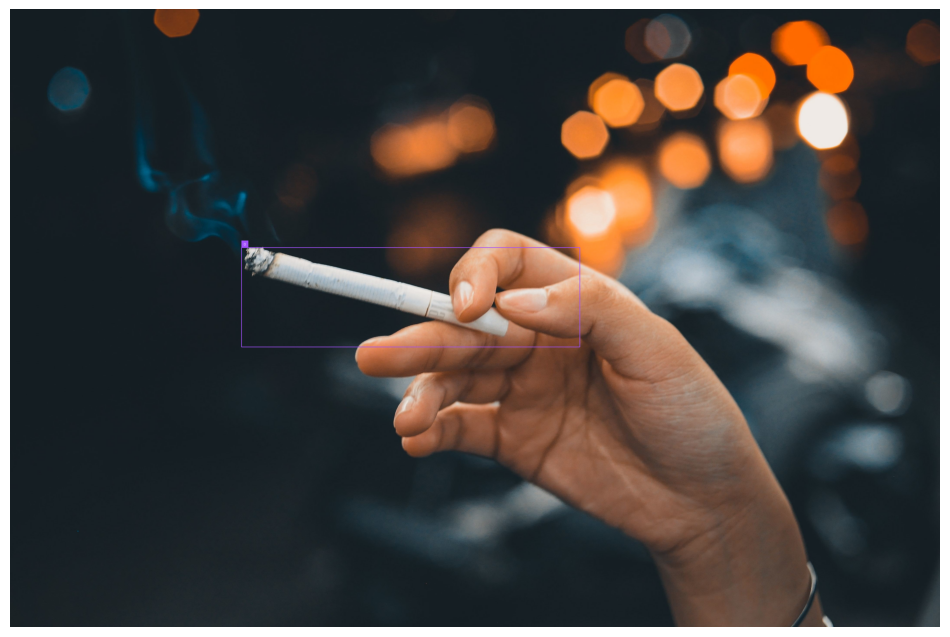


image 1/1 /content/images/image_0.jpg: 480x640 1 0, 16.6ms
Speed: 3.5ms preprocess, 16.6ms inference, 0.6ms postprocess per image at shape (1, 3, 480, 640)


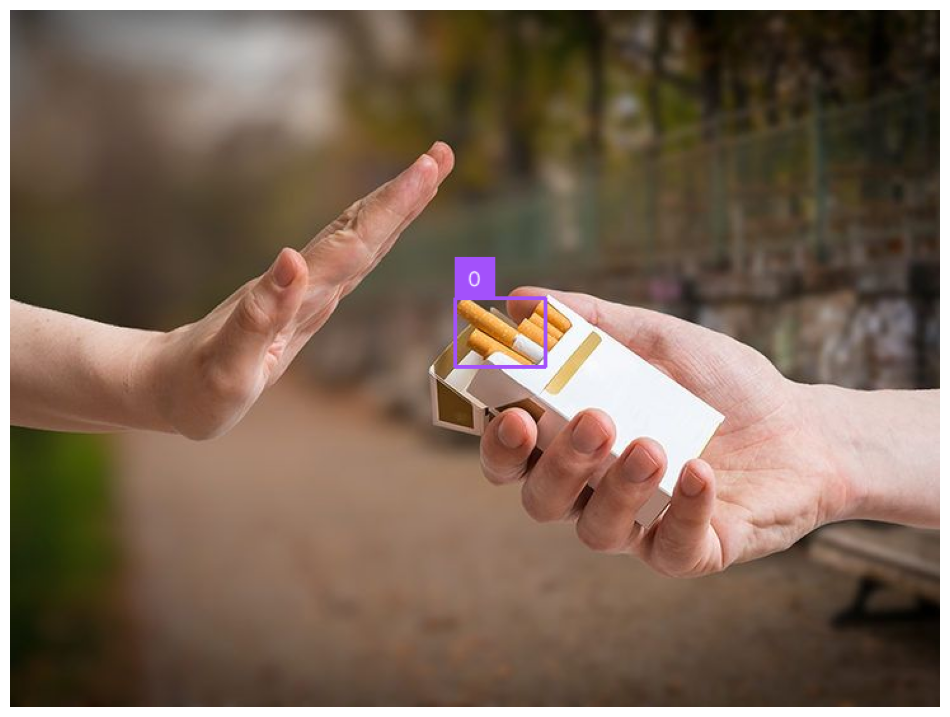

In [23]:
import cv2
import supervision as sv
from ultralytics import YOLO
import glob

# بارگذاری مدل سفارشی
model = YOLO(f'/content/runs/detect/train2/weights/best.pt')

# بارگذاری تصاویر
image_paths = glob.glob(os.path.join(image_folder, '*.jpg'))

# پردازش و نمایش هر تصویر
for image_path in image_paths:
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Unable to load image from path: {image_path}")

    results = model(source=image_path, conf=0.25)[0]
    detections = sv.Detections.from_ultralytics(results)

    # استفاده از نام‌های جدید کلاس‌ها
    box_annotator = sv.BoxAnnotator()
    label_annotator = sv.LabelAnnotator()

    # نمایش تصویر
    annotated_image = box_annotator.annotate(
        scene=image, detections=detections)
    annotated_image = label_annotator.annotate(
        scene=annotated_image, detections=detections)

    sv.plot_image(annotated_image)


Abolfazl Sohrabi

[GitHub](https://github.com/AABOLFAZLSOHRABI)